In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [45]:
df = pd.read_csv('Loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [46]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

<ipython-input-46-90613879d37d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [47]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [48]:
df[['Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History','Gender']] = df[['Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History','Gender']].fillna(df.mode().iloc[0])
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

<ipython-input-48-1ef9867f476e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [49]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [50]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [51]:
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

In [52]:
# Label Encoding for binary variables
label_enc = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
le = LabelEncoder()
for col in label_enc:
    df[col] = le.fit_transform(df[col])

In [53]:
# One-Hot Encoding for multiclass variables
df = pd.get_dummies(df, columns=['Property_Area', 'Dependents'], drop_first=True)

In [54]:
scaler = StandardScaler()
df[['LoanAmount', 'Loan_Amount_Term', 'TotalIncome']] = scaler.fit_transform(
    df[['LoanAmount', 'Loan_Amount_Term', 'TotalIncome']]
)

In [55]:
df[['LoanAmount', 'Loan_Amount_Term', 'TotalIncome']].head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,-0.211241,0.273231,-0.182184
1,-0.211241,0.273231,-0.144684
2,-0.948996,0.273231,-0.623656
3,-0.306435,0.273231,-0.322885
4,-0.056551,0.273231,-0.158785


In [57]:
X = df.drop(['Loan_Status','Loan_ID'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train.shape

(491, 13)

In [79]:
model = SVC(kernel='rbf', random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

🔥 Accuracy: 0.77
Precision: 0.7549019607843137
Recall: 0.9625
F1- Score: 0.8461538461538461


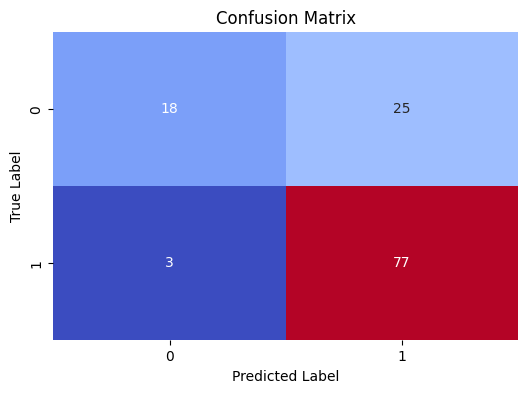

In [83]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"🔥 Accuracy: {acc:.2f}")

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1- Score: {f1}')
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Define hyperparameters grid to tune

In [84]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3],
}

In [85]:
# Set GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit GridSearchCV to training data
n_model= grid_search.fit(X_train, y_train)
y_pred = n_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"🔥 Accuracy: {acc:.2f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
🔥 Accuracy: 0.79


In [91]:
print("Best hyperparameters found:", grid_search.best_params_)

# Get the best estimator
best_svm = grid_search.best_estimator_

# Evaluate performance on the test data
y_pred = best_svm.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Best hyperparameters found: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Precision: 0.8252526249958856
Recall: 0.7886178861788617
F1-Score: 0.7614910090194872


In [92]:
final_model = best_svm.fit(X, y)
import joblib
joblib.dump(final_model, 'Bilal_Model.pkl')

['Bilal_Model.pkl']